In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
plt.style.use('seaborn-v0_8')
%matplotlib inline



# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [ ]:
# Load Data and Preprocess
def load_data(filepath):
    # Load CSV (semicolon separated)
    df = pd.read_csv('bank-full.csv')

    # Categorical columns
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply Label Encoding
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
                'housing', 'loan', 'default']

    X = df[features]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df


#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # ---- Visualization ----
    plt.figure(figsize=(14, 4))

    # Explained variance bar plot
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.title("Explained Variance Ratio")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")

    # 2D PCA scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
    plt.title("PCA Projection (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()

    return X_pca


#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    inertia_list = []

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia_list.append(kmeans.inertia_)

    # Plot Elbow Curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, max_clusters + 1), inertia_list, marker='o')
    plt.title("Elbow Curve for Optimal K")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (WCSS)")
    plt.grid(True)
    plt.show()

    return inertia_list


# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    if n_clusters is None:
      raise ValueError("Please provide n_clusters from elbow method results.")

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                c='red', marker='x', s=200)
    plt.title(f"K-Means Clustering (k={n_clusters})")
    plt.show()

    return labels, kmeans


#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    if n_clusters is None:
        raise ValueError("Please provide n_clusters.")

    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X)

    # Plot clusters
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', alpha=0.7)
    plt.title(f"Agglomerative Clustering (k={n_clusters})")
    plt.show()

    return labels

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    linked = linkage(X, method='ward')
    return linked

# Plot Dendrogram
def plot_dendrogram(linked):
    plt.figure(figsize=(10, 5))
    dendrogram(linked)
    plt.title("Dendrogram (Hierarchical Clustering)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [9]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X =df[features] # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

Data shape: (45211, 9)


In [13]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        # Randomly choose distinct points as initial centroids
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        centroids = X[indices]
        return centroids


    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

        # Assign cluster with minimum distance
        labels = np.argmin(distances, axis=1)

        return labels

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        n_features = X.shape[1]
        new_centroids = np.zeros((self.n_clusters, n_features))

        for k in range(self.n_clusters):
            cluster_points = X[labels == k]

            if cluster_points.size == 0:
                # Dangerous cluster empty case → reinitialize randomly
                # (Students can explain this behavior in report)
                new_centroids[k] = X[np.random.randint(0, X.shape[0])]
            else:
                # Mean of all points in cluster
                new_centroids[k] = cluster_points.mean(axis=0)

        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):

            # Step 2: Assign clusters
            labels = self._assign_clusters(X)

            # Step 3: Compute new centroids
            new_centroids = self._update_centroids(X, labels)

            # Step 4: Check for convergence
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break

            self.centroids = new_centroids

        # Save final labels
        self.labels = labels
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

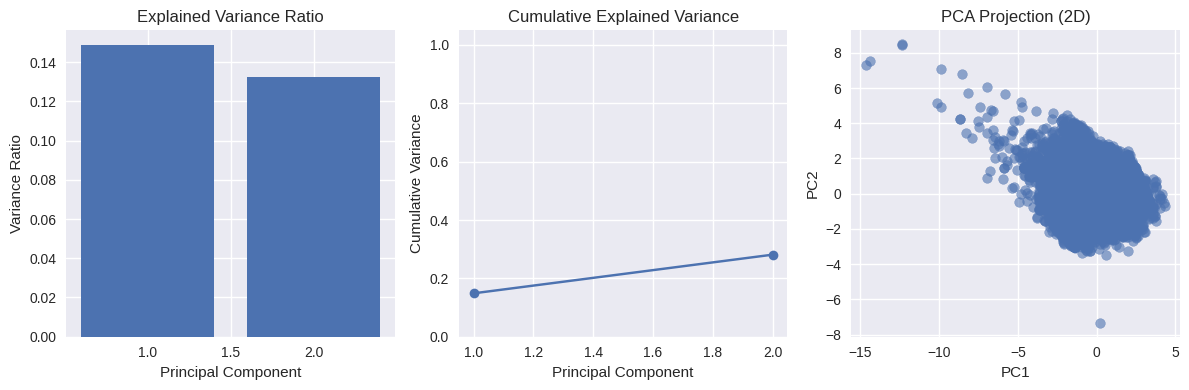

Shape after PCA: (45211, 2)


In [25]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    # Your code here
    plt.subplot(1, 3, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.title("Explained Variance Ratio")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance Ratio")

    plt.subplot(1, 3, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, marker='o')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Principal Component")
    plt.ylabel("Cumulative Variance")
    plt.ylim(0, 1.05)

    # Plot data in 2D
    # Your code here
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
    plt.title("PCA Projection (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()


    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

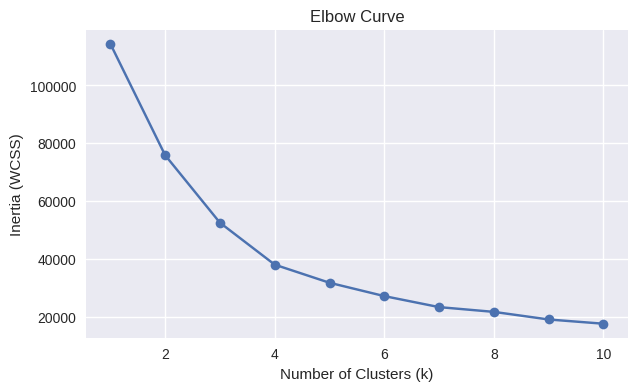

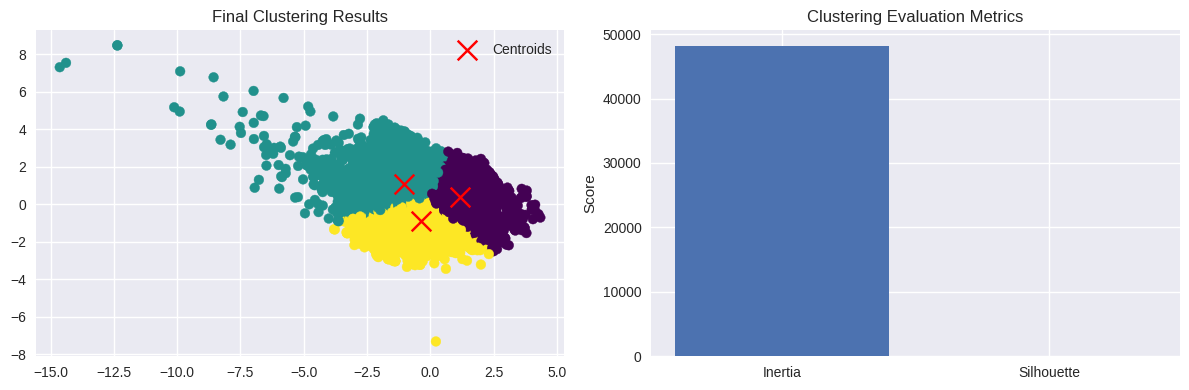


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [15]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        if cluster_points.size == 0:
            continue
        distances = np.linalg.norm(cluster_points - centroids[k], axis=1) ** 2
        inertia += distances.sum()
    # Calculate distances between points and their assigned centroids
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    # Your code here
    for k in K:
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        inertias.append(model.inertia_)
    # Create elbow plot
    plt.figure(figsize=(7, 4))
    plt.plot(K, inertias, marker='o')
    plt.title("Elbow Curve")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (WCSS)")
    plt.grid(True)
    plt.show()

    # Your code here

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Calculate evaluation metrics BEFORE plotting
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

# Visualize final results
plt.figure(figsize=(12, 4))

# ---- Plot clusters ----
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# ---- Plot evaluation metrics ----
plt.subplot(1, 2, 2)
plt.bar(["Inertia", "Silhouette"], [inertia, silhouette])
plt.title("Clustering Evaluation Metrics")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

# Print metrics
print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

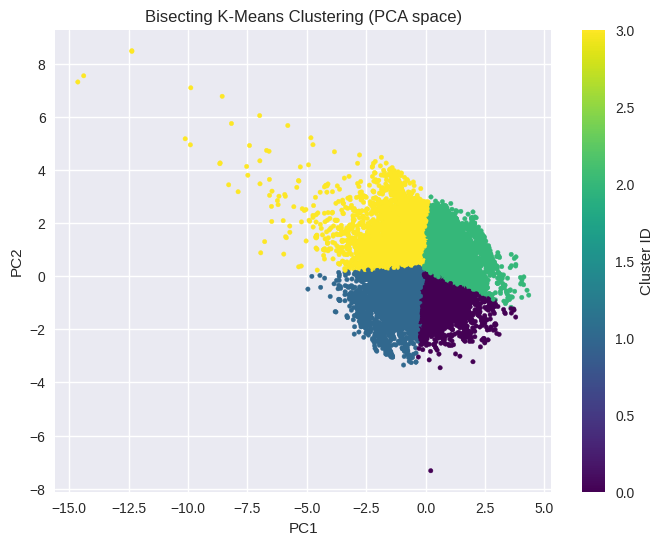

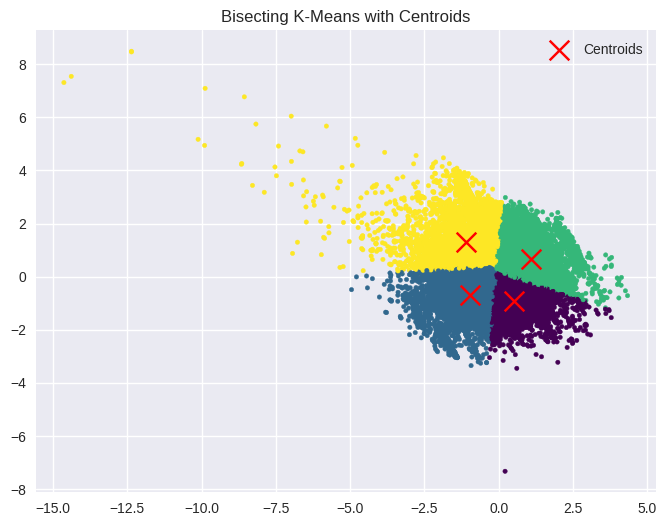

In [21]:
from sklearn.cluster import KMeans
import numpy as np

class BisectingKMeans:
    """Optimized bisecting K-means implementation (fast for large datasets)."""

    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}      # parent → (left_child, right_child)
        self.centers_ = {}        # cluster_id → centroid

    def fit_predict(self, X):
        n_samples = X.shape[0]

        # Step 1: start with all points in cluster 0
        labels = np.zeros(n_samples, dtype=int)

        # Next unused cluster label
        next_label = 1

        # Keep splitting until we reach the target number of clusters
        while len(np.unique(labels)) < self.n_clusters:


            unique_labels, counts = np.unique(labels, return_counts=True)
            cluster_to_split = unique_labels[np.argmax(counts)]

            # Get only points from that cluster
            mask = labels == cluster_to_split
            X_sub = X[mask]

            km = KMeans(
                n_clusters=2,
                random_state=self.random_state,
                n_init=1,           # Much faster than 10
                max_iter=100,       # Lower iterations
                algorithm="elkan"   # Accelerated K-means
            )
            sub_labels = km.fit_predict(X_sub)

            # subcluster 0 keeps original cluster ID
            # subcluster 1 gets a NEW ID (next_label)
            new_cluster_id = next_label

            # Update global labels
            labels_sub = labels[mask]
            labels_sub[sub_labels == 0] = cluster_to_split
            labels_sub[sub_labels == 1] = new_cluster_id
            labels[mask] = labels_sub

            self.split_tree[cluster_to_split] = (cluster_to_split, new_cluster_id)
            self.centers_[cluster_to_split] = km.cluster_centers_[0]
            self.centers_[new_cluster_id] = km.cluster_centers_[1]

            next_label += 1

        # Save final labels
        self.labels_ = labels
        return labels

bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=10)
plt.title("Bisecting K-Means Clustering (PCA space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster ID")
plt.show()

centroids = np.array([bisect.centers_[cid] for cid in sorted(bisect.centers_.keys())])

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=10)
plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="x", s=200, label="Centroids")
plt.title("Bisecting K-Means with Centroids")
plt.legend()
plt.show()


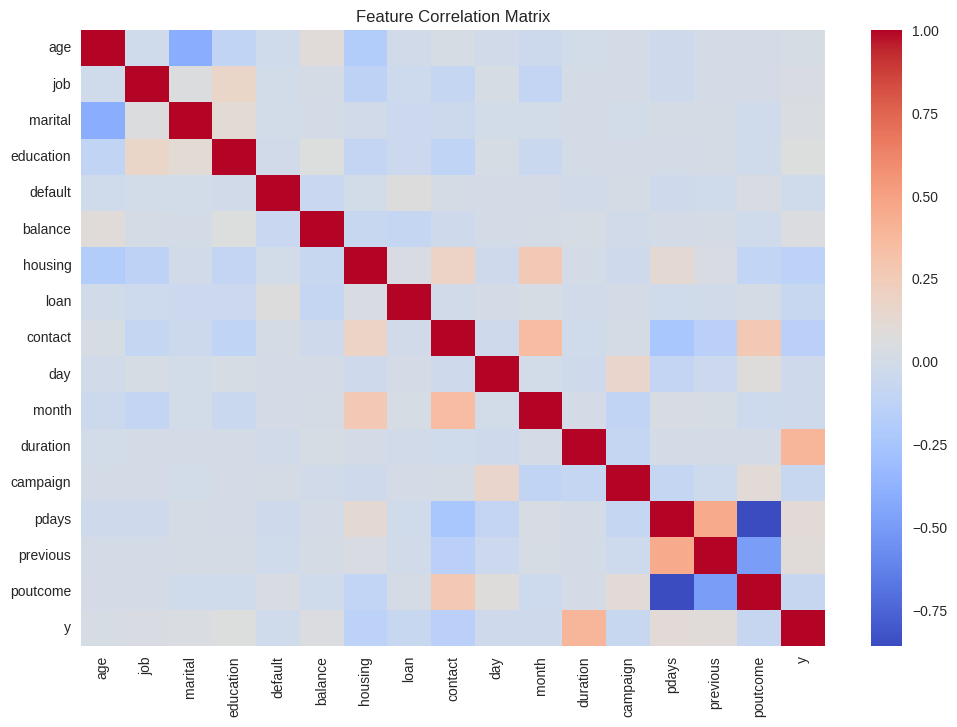

In [28]:
#feature correlation matrix
plt.figure(figsize=(12, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


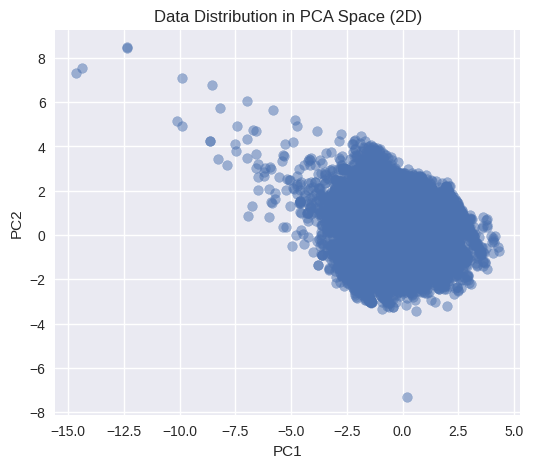

In [31]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title("Data Distribution in PCA Space (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


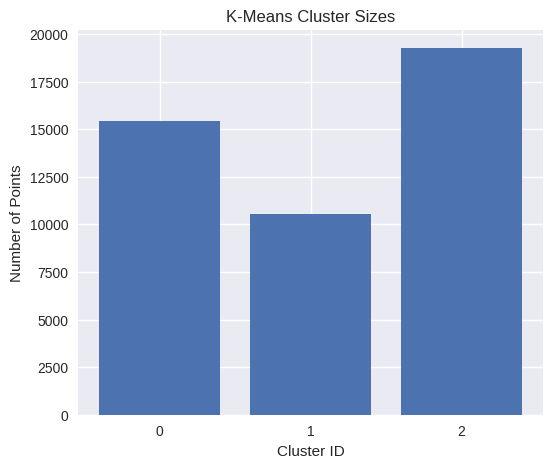

In [32]:
unique, counts = np.unique(kmeans.labels, return_counts=True)

plt.figure(figsize=(6,5))
plt.bar(unique, counts)
plt.title("K-Means Cluster Sizes")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.xticks(unique)
plt.show()


/tmp/ipython-input-1324515251.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cluster_silhouettes, labels=unique)


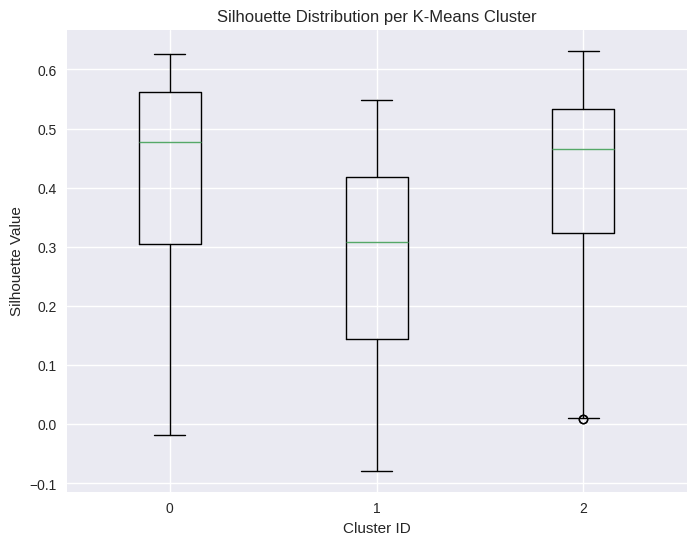

In [33]:
from sklearn.metrics import silhouette_samples

sil_vals = silhouette_samples(X_pca, kmeans.labels)

cluster_silhouettes = []

for cluster in unique:
    cluster_silhouettes.append(sil_vals[kmeans.labels == cluster])

plt.figure(figsize=(8,6))
plt.boxplot(cluster_silhouettes, labels=unique)
plt.title("Silhouette Distribution per K-Means Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Silhouette Value")
plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!